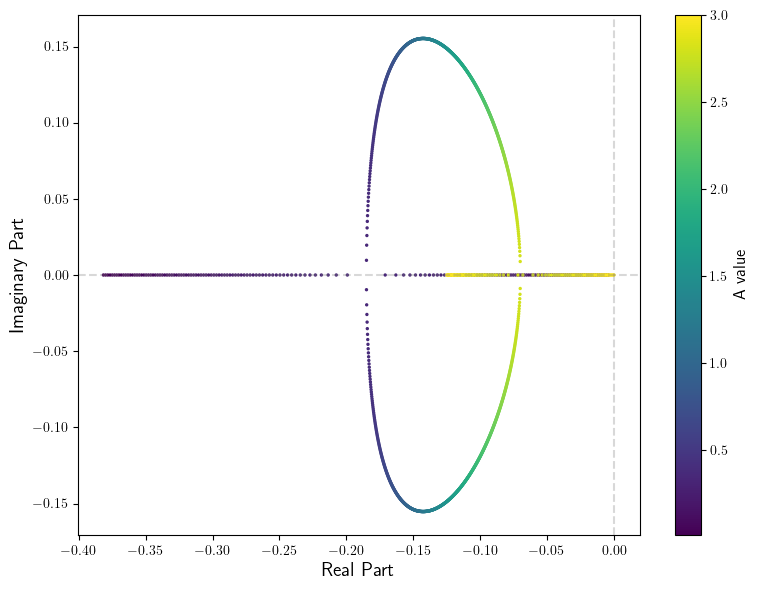

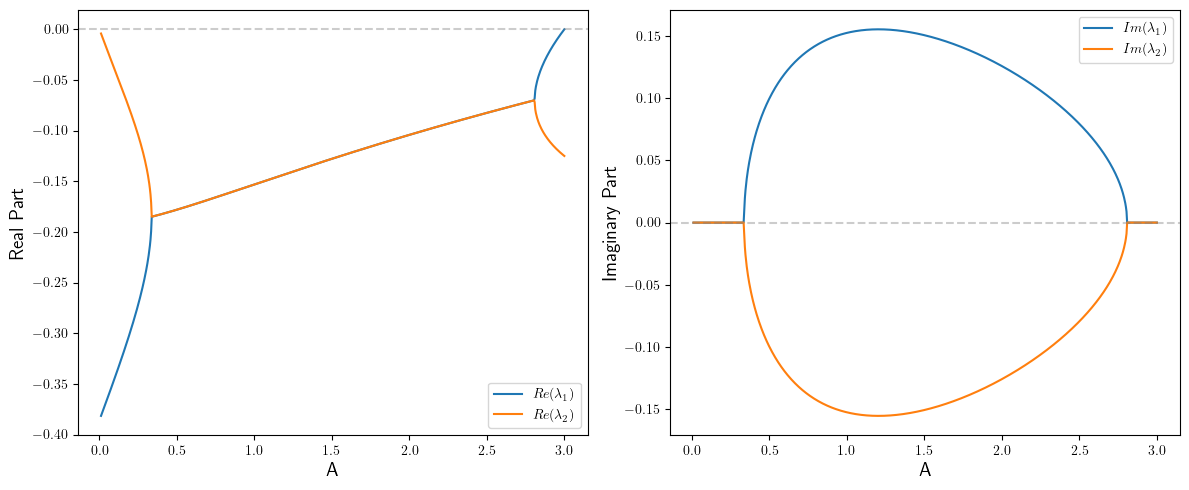

In [44]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = True


# Parameters
rho1 = 0.6
rho2 = 0.1
alpha1 = 0.2
delta2 = 0.3
CC = 0.887
A_values = np.linspace(0.01, 3.0, 750)
colors = cm.viridis(np.linspace(0, 1, len(A_values)))

def compute_eigenvalues(A):
    S = CC * (1 - (alpha1 * A / rho1))
    numerator = alpha1 * A * S
    denominator = delta2 * (A / (1 + A)) + alpha1 * A * (1 - (rho2 / rho1))
    x2 = numerator / denominator
    x1 = S - x2

    Jx = np.array([
        [rho1 - (2 * rho1 / CC) * x1 - (rho1 / CC) * x2 - alpha1 * A, -(rho1 / CC) * x1],
        [alpha1 * A - (rho2 / CC) * x2, rho2 - (2 * rho2 / CC) * x2 - (rho2 / CC) * x1 - delta2 * (A / (1 + A))]
    ])

    eigenvals = np.linalg.eigvals(Jx)
    return eigenvals

# First plot: complex eigenvalue plane with colorbar
real_parts = []
imag_parts = []
A_mapped = []

for A in A_values:
    eigs = compute_eigenvalues(A)
    for eig in eigs:
        real_parts.append(eig.real)
        imag_parts.append(eig.imag)
        A_mapped.append(A)

plt.figure(figsize=(8, 6))
sc = plt.scatter(real_parts, imag_parts, c=A_mapped, cmap='viridis', s=2)
plt.axhline(0, color='gray', linestyle='--', alpha=0.3)
plt.axvline(0, color='gray', linestyle='--', alpha=0.3)
plt.xlabel("Real Part", fontsize=14)
plt.ylabel("Imaginary Part", fontsize=14)
cbar = plt.colorbar(sc)
cbar.set_label("A value", fontsize=12)
plt.tight_layout()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('focus_2_1.pdf')
plt.show()

# Second plot: real and imaginary parts vs A
e1_real, e1_imag = [], []
e2_real, e2_imag = [], []

for A in A_values:
    eigs = compute_eigenvalues(A)
    e1_real.append(eigs[0].real)
    e1_imag.append(eigs[0].imag)
    e2_real.append(eigs[1].real)
    e2_imag.append(eigs[1].imag)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(A_values, e1_real, label=r'$Re(\lambda_1)$')
plt.plot(A_values, e2_real, label=r'$Re(\lambda_2)$')
plt.axhline(0, color='gray', linestyle='--', alpha=0.4)
plt.xlabel("A", fontsize=14)
plt.ylabel("Real Part", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(A_values, e1_imag, label=r'$Im(\lambda_1)$')
plt.plot(A_values, e2_imag, label=r'$Im(\lambda_2)$')
plt.axhline(0, color='gray', linestyle='--', alpha=0.4)
plt.xlabel("A", fontsize=14)
plt.ylabel("Imaginary Part", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()

plt.tight_layout()
plt.savefig('focus_2.pdf')
plt.show()
